# Red Wine Quality Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/winequality-red.csv', sep=';')

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# About Dataset -:

The dataset is related to red variants of the Portuguese "Vinho Verde" wine. The "Red Wine Quality" dataset is commonly used in machine learning and data analysis. These datasets contain information about various physicochemical properties of red wines and their quality ratings. The goal is often to predict the quality of the wine based on its chemical characteristics.

In this dataset there are total 12 columns between that 11 input features and 1 target output column. All the columns have numerical values. On this dataset we are going to build classification model and predition will tell if wine have good quality or bad quality.

This report delves into a detailed analysis of key features influencing the quality of red wine. Each feature provides insights into the chemical composition and characteristics that contribute to the overall sensory experience of wine.

1. Fixed Acidity:
Fixed acidity, comprising low volatility organic acids, is inherent to the wine sample. It plays a pivotal role in determining the overall acidity of the wine, contributing to its taste profile.

2. Volatile Acidity:
The measure of acetic acid content, volatile acidity, is crucial in avoiding an unpleasant, vinegar taste. Short-chain organic acids extracted through distillation contribute to this feature.

3. Citric Acid:
Found in small quantities, citric acid adds "freshness" and flavor to wines. Its natural occurrence in citrus fruits and role as an intermediate in the citric acid cycle enhance the wine's complexity.

4. Residual Sugar:
The amount of unfermented sugar post-fermentation influences sweetness. Compliance with EU regulations regarding residual sugar levels is linked to specific labeling terms.

5. Chlorides:
Reflecting salt content, chlorides are extracted during red winemaking. Adherence to legal limits ensures a balanced and safe finished wine.

6. Free Sulfur Dioxide:
Existing in equilibrium with bisulfite ions, free sulfur dioxide exhibits germicidal and antioxidant properties. The sum of free and bound sulfites defines the total sulfite concentration.

7. Total Sulfur Dioxide:
The combination of free and bound forms of SO2 in wine influences stability. While low concentrations render SO2 mostly undetectable, free SO2 is crucial for preserving wine quality.

8. Density:
Measured by specific gravity using a hydrometer, density is influenced by alcohol and sugar content, providing insights into the wine's composition.

9. pH:
Describing acidity or basicity on a scale of 0 to 14, pH levels impact the wine's stability during vinification and aging. A range between 3 and 4 is typical, with higher pH posing potential challenges.

10. Sulphates:
As a wine additive contributing to sulfur dioxide gas levels, sulphates act as antimicrobials. Their natural occurrence and addition by winemakers help preserve and protect against spoilage.

11. Alcohol:
Representing the percentage of alcohol content, this feature contributes to the overall character and body of the wine.

12. Quality:
The output variable, scored between 3 and 8 based on sensory data, provides a holistic assessment of the wine's quality.




### General Infromation About Dataset

In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The statistical overview of the red wine dataset provides valuable insights into its key attributes. Here are notable findings:

1. Fixed Acidity : The dataset exhibits a broad range of nonvolatile acids, with an average fixed acidity of 8.31 and a maximum value of 15.9.

2. Volatile Acidity : Variability in acetic acid content is evident, as reflected by an average volatile acidity of 0.52, with a maximum value of 1.58.

3. Citric Acid : Citric acid content varies, contributing freshness and flavor. The dataset shows an average citric acid level of 0.27, with a maximum value of 1.

4. Residual Sugar : Sweetness levels vary, with an average residual sugar of 2.53 and a maximum value of 15.5.

5. Chlorides : Diversity in salt content is observed, with an average chloride level of 0.08 and a maximum value of 0.61.

6. Free Sulfur Dioxide : Levels of free sulfur dioxide, crucial for germicidal and antioxidant properties, range from an average of 15.87 to a maximum of 72.

7. Total Sulfur Dioxide : The combined levels of free and bound sulfur dioxide show variability, with an average of 46.46 and a maximum value of 289.

8. Density : The dataset indicates diverse density levels, with an average of 0.99 and a maximum value of 1, influenced by alcohol and sugar content.

9. pH : Acidity or basicity varies, with an average pH of 3.31 and a maximum value of 4.01, impacting stability during vinification and aging.

10. Sulphates : The dataset demonstrates variability in sulphates content, with an average of 0.65 and a maximum value of 2, influencing sulfur dioxide levels.

11. Alcohol : Alcohol content varies, contributing to the character and body of wines. The average alcohol level is 10.42, with a maximum value of 14.90.

12. Quality : Perceived quality, based on sensory data, ranges from an average score of 5.63 to a maximum of 8.

In [ ]:
df.shape

(1599, 12)

### Handling Null Values

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The dataset is devoid of any missing values, exhibiting completeness and integrity throughout.

### Handling Duplicates

In [ ]:
df.duplicated().sum()

240

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

We have identified and subsequently removed a total of 240 duplicate entries from the dataset to enhance data accuracy and maintain integrity.

### Handling Outliers

<Axes: >

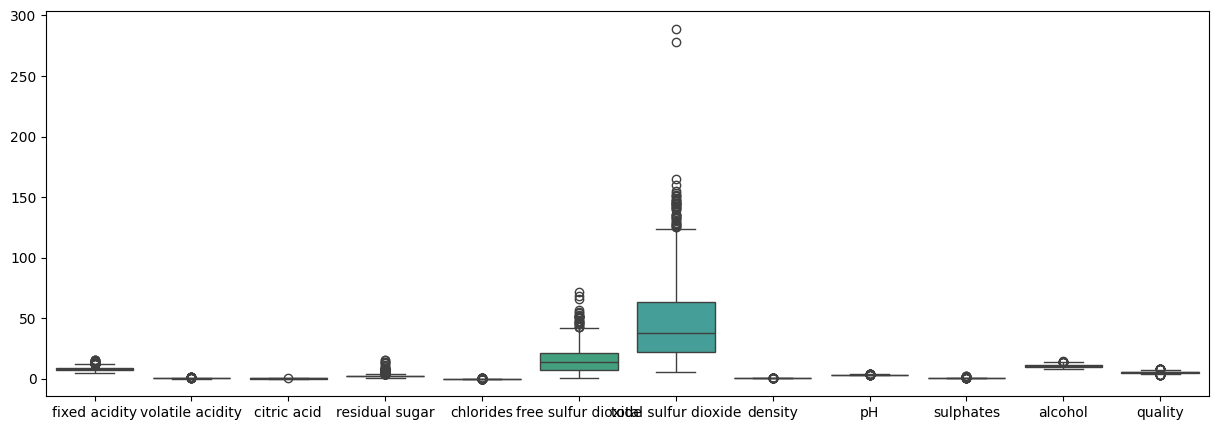

In [ ]:
fig = plt.subplots(figsize=(15,5))
sns.boxplot(df)

Each feature column exhibits the presence of outliers, indicating the need for careful consideration and potential application of outlier-handling techniques in the analysis

In [ ]:
def cap_outlier(value):
    if value < lower_limit:
        return lower_limit
    elif value > upper_limit:
        return upper_limit
    else:
        return value

In [ ]:
for i in df.columns:
  if df[i].dtype == 'int' or df[i].dtype == 'float':
    pcent25=df[i].quantile(0.25)
    pcent75=df[i].quantile(0.75)

    iqr=pcent75-pcent25

    upper_limit=pcent75+1.5*iqr
    lower_limit=pcent25-1.5*iqr

    df[i]=df[i].apply(cap_outlier)

<Axes: >

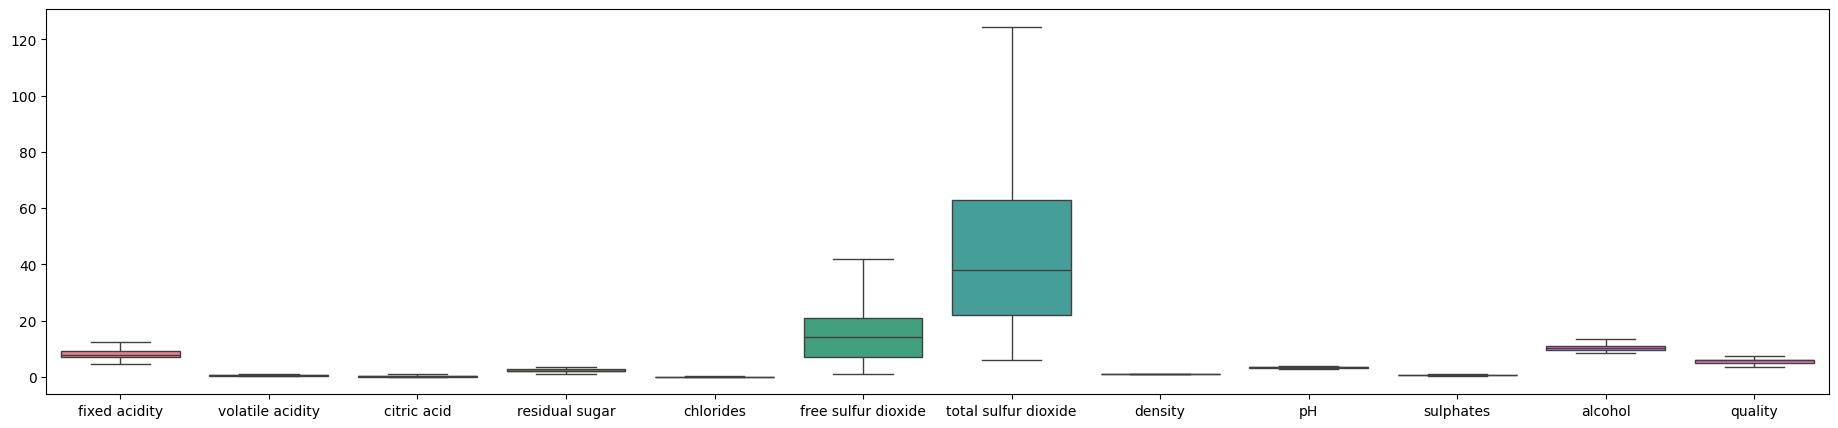

In [ ]:
fig = plt.subplots(figsize=(23,5))
sns.boxplot(df)

We have effectively managed outliers using a capping technique in our outlier detection and removal process. The data has been successfully purged of outliers, marking the completion of our comprehensive preprocessing procedures.

### Exploratry Data Analysis (EDA)

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6.0
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


<Axes: >

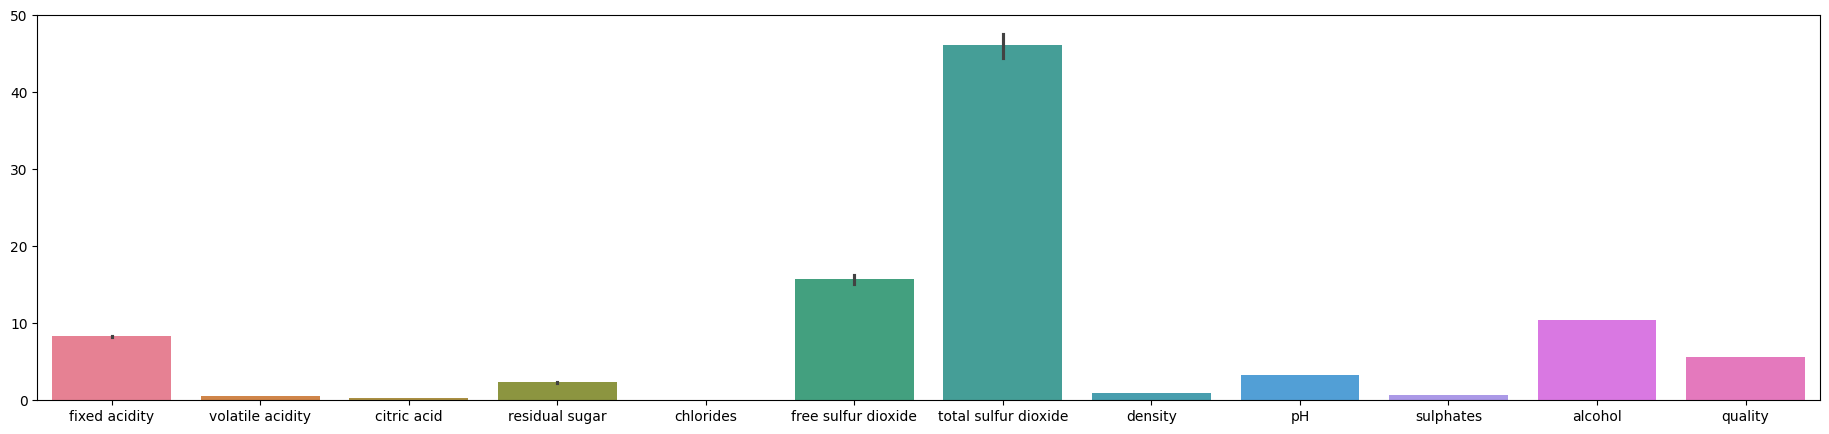

In [ ]:
fig = plt.subplots(figsize=(23,5))
sns.barplot(df)

### Checking Data Distribution and Range

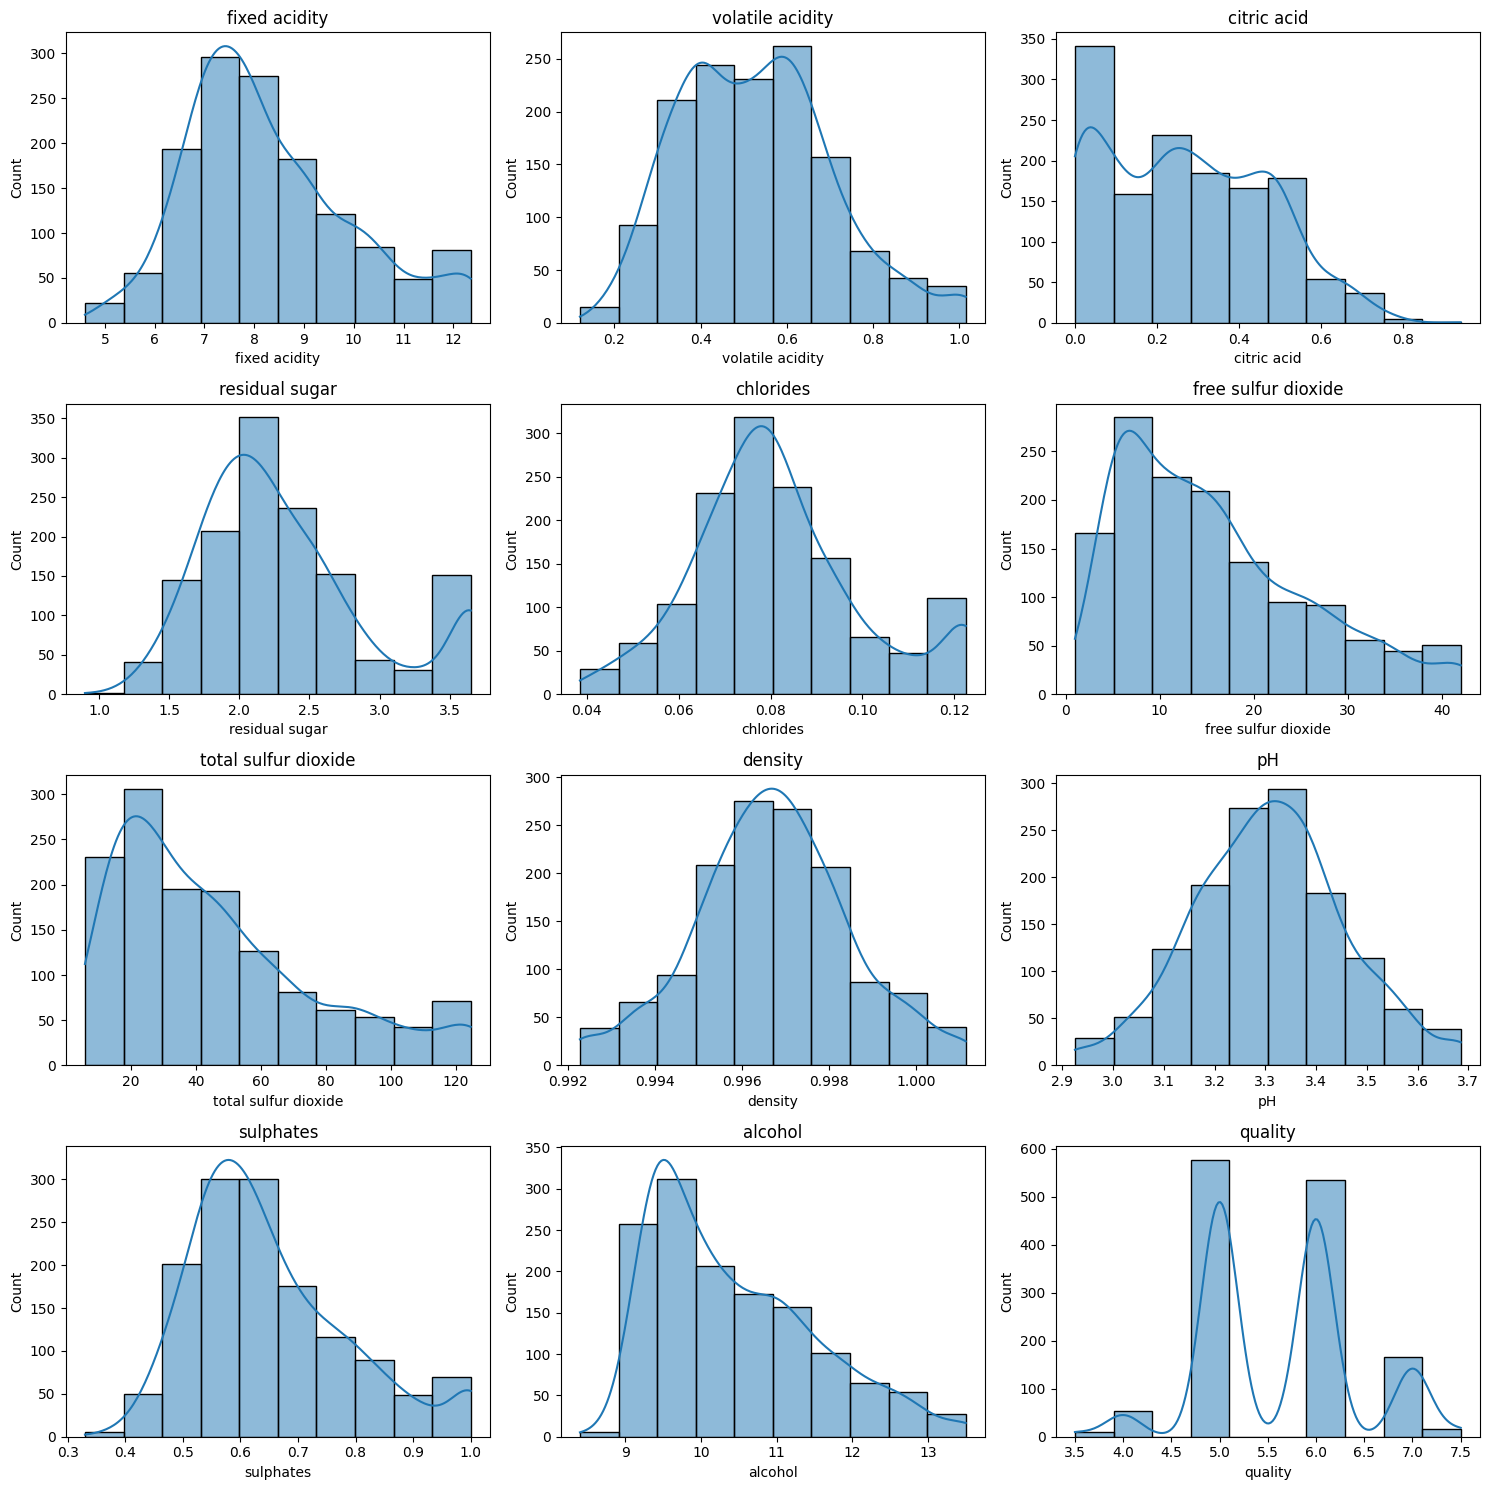

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(15,15))
axes = axes.flatten()
for i, data in enumerate(df.columns):
    sns.histplot(df[data], bins = 10,kde = True,cbar = True, ax=axes[i]).set(title=data)

plt.tight_layout()
plt.show()

The distribution analysis reveals distinctive patterns across the dataset variables. Notably:

**Both "pH" and "density" variables exhibit relatively normal distributions, providing a stable foundation for analysis.**

1. Fixed Acidity : The majority of "fixed_acidity" values fall within the range of 7 - 8, suggesting a concentration in this interval.

2. Volatile Acidity : Most values of "volatile_acidity" cluster between 0.4 - 0.7, indicating a central tendency in this specific range.

3. Citric Acid : The concentration of "citric_acid" values is predominantly in the range of 0.0 - 0.1.

4. Residual Sugar:The majority of "residual_sugar" values are distributed between 1 - 2.5, showcasing a prevalent range in sweetness levels.

5. Chlorides : Values of the "chlorides" variable are concentrated between 0.085 - 0.15, indicating a specific range for salt content.

6. Free Sulfur Dioxide : The distribution of "free_sulfur_dioxide" values centers around 0 - 15, suggesting a prevalent range for this variable.

7. Total Sulfur Dioxide : Most values of "total_sulfur_dioxide" fall within the range of 0 - 30, emphasizing a central tendency in this interval.

8. Density : The majority of "density" values are concentrated between 0.996 - 0.998, indicating a specific range for this variable.

9. pH : Values of the "pH" variable predominantly fall within the range of 3.2 - 3.4, suggesting a consistent acidity level.

10. Sulphates : The concentration of "sulphates" values is mostly in the range of 0.50 - 0.75, indicating a central tendency in this interval.

11. Alcohol: The majority of "alcohol" values are distributed between 9 - 10, emphasizing a prevalent alcohol content range.

12. Quality : Values of the "quality" variable are most commonly 5 and 6, suggesting a concentration in these two quality levels.

### Checking Correlation with Output Columns

[Text(0.5, 1.0, 'Relationship between density and quality')]

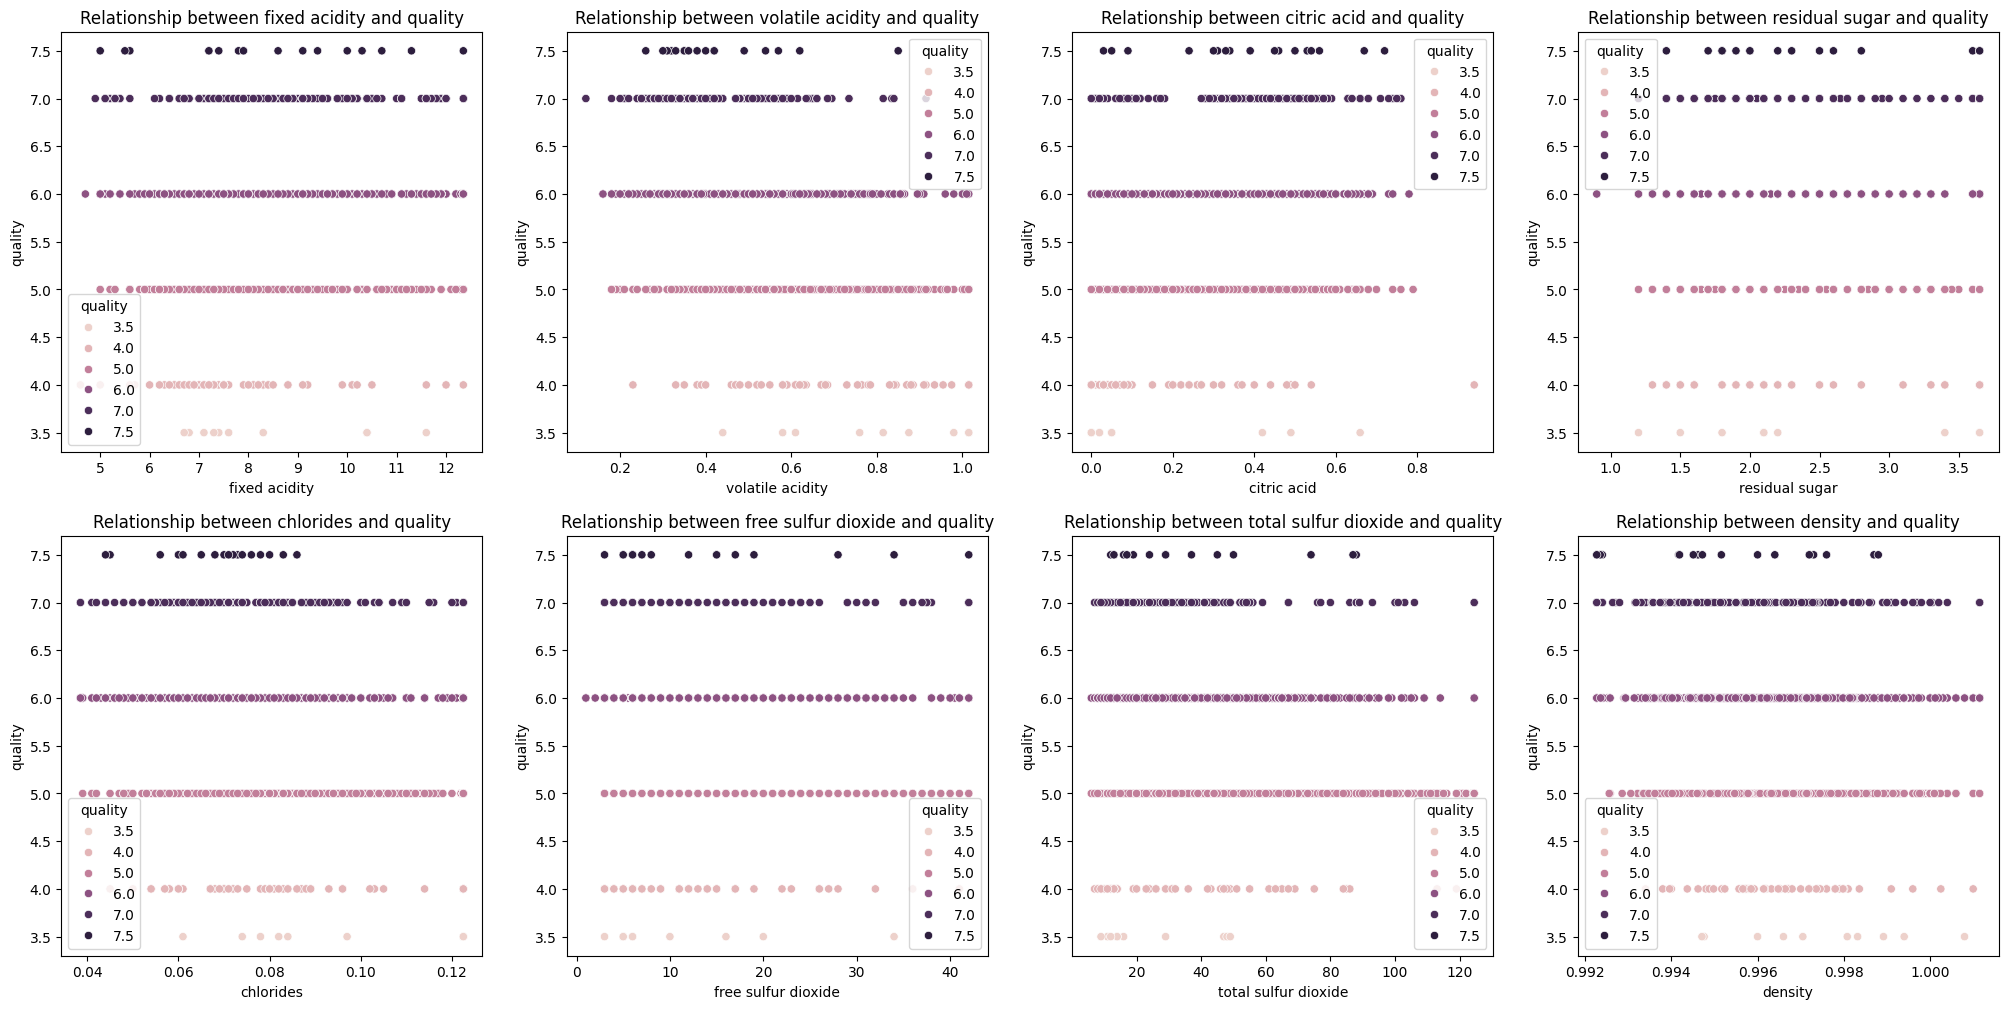

In [ ]:
fig,axes = plt.subplots(2,4,figsize=(25,12))
sns.scatterplot(ax=axes[0,0],x='fixed acidity',y='quality',data=df, hue = "quality",).set(title='Relationship between fixed acidity and quality')
sns.scatterplot(ax=axes[0,1],x='volatile acidity',y='quality',data=df, hue = "quality",).set(title='Relationship between volatile acidity and quality')
sns.scatterplot(ax=axes[0,2],x='citric acid',y='quality',data=df, hue = "quality",).set(title='Relationship between citric acid and quality')
sns.scatterplot(ax=axes[0,3],x='residual sugar',y='quality',data=df, hue = "quality",).set(title='Relationship between residual sugar and quality')
sns.scatterplot(ax=axes[1,0],x='chlorides',y='quality',data=df, hue = "quality",).set(title='Relationship between chlorides and quality')
sns.scatterplot(ax=axes[1,1],x='free sulfur dioxide',y='quality',data=df, hue = "quality",).set(title='Relationship between free sulfur dioxide and quality')
sns.scatterplot(ax=axes[1,2],x='total sulfur dioxide',y='quality',data=df, hue = "quality",).set(title='Relationship between total sulfur dioxide and quality')
sns.scatterplot(ax=axes[1,3],x='density',y='quality',data=df, hue = "quality",).set(title='Relationship between density and quality')

[Text(0.5, 1.0, 'Relationship between alcohol and quality')]

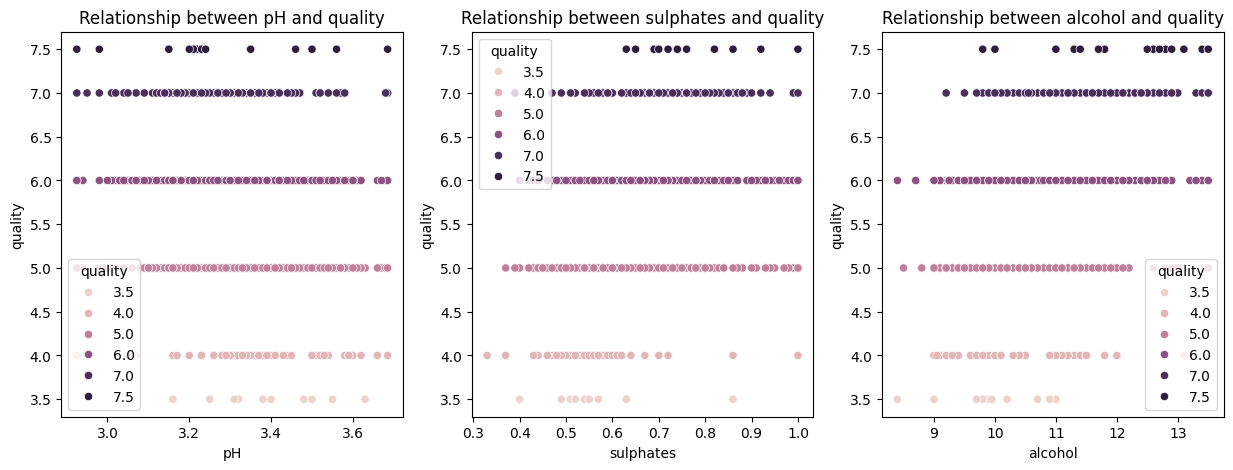

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(ax=axes[0],x=df['pH'],y='quality',data=df, hue = "quality").set(title='Relationship between pH and quality')
sns.scatterplot(ax=axes[1],x=df['sulphates'],y='quality',data=df, hue = "quality",).set(title='Relationship between sulphates and quality')
sns.scatterplot(ax=axes[2],x=df['alcohol'],y='quality',data=df, hue = "quality",).set(title='Relationship between alcohol and quality')

<Figure size 1500x800 with 0 Axes>

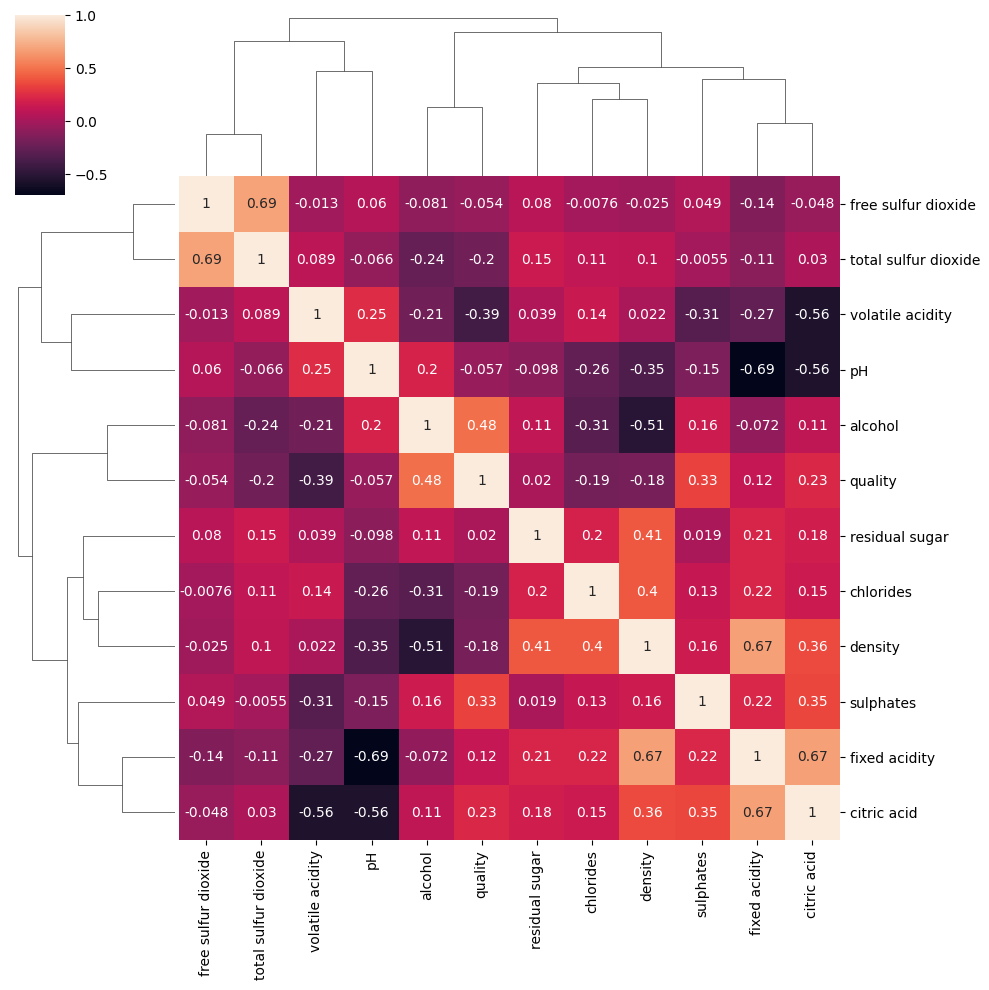

In [ ]:
plt.figure(figsize=(15,8))
sns.clustermap(df.corr(), annot=True)

In [ ]:
df.corr()["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.484899
sulphates               0.332457
citric acid             0.229658
fixed acidity           0.124298
residual sugar          0.020125
free sulfur dioxide    -0.054451
pH                     -0.056892
density                -0.183043
chlorides              -0.191047
total sulfur dioxide   -0.203733
volatile acidity       -0.393721
Name: quality, dtype: float64

The scatter plot and heatmap analyses revealed notable correlations between certain features and the target column (quality). Specifically, alcohol, sulphates, citric acid, fixed acidity, and residual sugar exhibited substantial associations with the quality of the dataset, indicating their potential significance in influencing wine quality.

### Feature Engineering

In [ ]:
X=df.drop(columns=['quality'])
y=df['quality']
y = np.where(y >= 5, 1, 0)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

##### Data Scaling

In [ ]:
ss = StandardScaler()

X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

##### Transformation to Gaussian

In [ ]:
pt=PowerTransformer()

X_train_pt=pt.fit_transform(X_train_ss)
X_test_pt=pt.transform(X_test_ss)

### Finding Best Model

In [ ]:
models= {
    'RandomForestClassifier' : {
        'model' : RandomForestClassifier(),
        'param_grid' :{
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 3, 4]
            }
    },
    'XGBClassifer' : {
        'model' : XGBClassifier(),
         'param_grid' : {
             'n_estimators': [50, 100, 200],
             'max_depth': [None, 5, 10, 20, 30],
             'learning_rate': [0.01, 0.1, 0.2],
             'booster': ['gbtree', 'gblinear']
             }
    },
    'XGBRFClassifer': {
        'model' : XGBRFClassifier(),
         'param_grid' : {
             'n_estimators': [50, 100, 200],
             'max_depth': [None, 5, 10, 20, 30],
             'learning_rate': [0.01, 0.1, 0.2],
             'booster': ['gbtree']
             }
        }
    }

In [ ]:
results = {}
for model_name, config in models.items():
    grid_search = GridSearchCV(config['model'], config['param_grid'], cv=5, scoring='accuracy', n_jobs=1,error_score='raise')
    grid_search.fit(X_train_pt, y_train)
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'test_score': grid_search.best_estimator_.score(X_test, y_test)
    }

for model_name, result in results.items():
    print(f"Results for {model_name}:")
    print(f"  Best Parameters: {result['best_params']}")
    print(f"  Best Cross-Validation Score: {result['best_score']:.4f}")
    print(f"  Test Set Score with Best Model: {result['test_score']:.4f}\n")

Results for RandomForestClassifier:
  Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
  Best Cross-Validation Score: 0.9558
  Test Set Score with Best Model: 0.9485

Results for XGBClassifer:
  Best Parameters: {'booster': 'gblinear', 'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 200}
  Best Cross-Validation Score: 0.9558
  Test Set Score with Best Model: 0.9485

Results for XGBRFClassifer:
  Best Parameters: {'booster': 'gbtree', 'learning_rate': 0.01, 'max_depth': None, 'n_estimators': 50}
  Best Cross-Validation Score: 0.9549
  Test Set Score with Best Model: 0.9485



### Training Model

In [ ]:
xgbc= XGBClassifier(booster = 'gblinear', learning_rate = 0.1, max_depth = None, n_estimators = 50)

xgbc.fit(X_train_pt,y_train)
y_pred1 = xgbc.predict(X_test_pt)

In [ ]:
rfc= RandomForestClassifier(max_depth= 20, min_samples_leaf= 3, min_samples_split= 5, n_estimators= 50)

rfc.fit(X_train_pt,y_train)
y_pred2 = rfc.predict(X_test_pt)

### Checking Accuracy

In [ ]:
print('Accuracy Score', accuracy_score(y_test,y_pred1))
print('Cross Validation Score', np.mean(cross_val_score(xgbc,X_train_pt,y_train,cv=10,scoring='f1')))

Accuracy Score 0.9485294117647058
Cross Validation Score 0.9769419461716495


In [ ]:
print('Accuracy Score', accuracy_score(y_test,y_pred2))
print('Cross Validation Score', np.mean(cross_val_score(rfc,X_train_pt,y_train,cv=10,scoring='f1')))

Accuracy Score 0.9485294117647058
Cross Validation Score 0.9769196957655797
